# ЛАБОРАТОРНАЯ РАБОТА №9. ПОНИЖЕНИЕ РАЗМЕРНОСТИ. ОТ-БОР ПРИЗНАКОВ. ИЗВЛЕЧЕНИЕ ПРИЗНАКОВ

# ЗАДАНИЕ №1.
3. Выберите две модели (одна - для регрессии и другая - для классификации). Обучите выбранные модели с использованием данных в пространстве низкой размерности - используйте результаты выполнения пункта 3 (не забудьте, что понижать нужно и X_train и X_test, но проще всего понижать X).
4. Сформулируйте вывод о том, какие методы понижения размерности лучше всего подходят для Ваших данных.


#### 1. Для выполнения задания №1 используйте датасеты для задачи классификации и регрессии.

## Импортирование датасетов

In [1]:
import pandas as pd

df_regr = pd.read_csv('../../Datasets/Lab3_DataSet3_Preprocessed.csv')
df_regr.head()

,Mark_0,Mark_1,Mark_2,Mark_3,Mark_4,Mark_5,Mark_6,Model_0,Model_1,Model_2,...,Type_1,Type_2,Type_3,Distance,Engine_capacity_cm3,Fuel_type_0,Fuel_type_1,Fuel_type_2,Transmission,Price(euro)
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.443182,0.532995,0.0,0.0,1.0,1.0,7750
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.306818,0.380711,0.0,1.0,0.0,0.0,8550
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000002,0.329949,0.0,1.0,1.0,0.0,2200
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.250000,0.380711,0.0,1.0,0.0,0.0,6550
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.454545,0.431472,1.0,0.0,0.0,0.0,4100


In [2]:
df_clsf = pd.read_csv('../../Datasets/Lab4_DataSet4_Preprocessed_Resampled.csv').sample(frac=1)
df_clsf.head()

,Airline_0,Airline_1,Airline_2,Airline_3,Airline_4,Flight,AirportFrom_0,AirportFrom_1,AirportFrom_2,AirportFrom_3,...,AirportTo_3,AirportTo_4,AirportTo_5,AirportTo_6,AirportTo_7,AirportTo_8,DayOfWeek,Time,Length,Delay
146540,0.0,1.0,0.0,0.0,1.0,0.298259,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.333333,0.746676,0.198473,1
43505,0.0,0.0,1.0,1.0,0.0,0.112007,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.676697,0.225954,0
89008,0.0,1.0,0.0,0.0,1.0,0.232719,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.829251,0.479389,1
68133,0.0,0.0,0.0,1.0,1.0,0.899386,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.333333,0.637509,0.129771,0
27966,1.0,0.0,0.0,0.0,0.0,0.830901,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.166667,0.906228,0.140458,0


уменьшение потребления памяти

In [3]:
def reduce_mem_usage(df:pd.DataFrame):
  import numpy as np
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
    col_type = df[col].dtypes
    if str(col_type)[:5] == 'float':
      c_min = df[col].min()
      c_max = df[col].max()
      if c_min>np.finfo('f2').min and c_max < np.finfo('f2').max:
        df[col]=df[col].astype(np.float16)
      elif c_min>np.finfo('f4').min and c_max < np.finfo('f4').max:
        df[col]=df[col].astype(np.float32)
      else:
        df[col]=df[col].astype(np.float64)
    elif str(col_type)[:3] == 'int':
      c_min = df[col].min()
      c_max = df[col].max()
      if c_min>np.iinfo('i1').min and c_max < np.iinfo('i1').max:
        df[col]=df[col].astype(np.int8)
      elif c_min>np.iinfo('i2').min and c_max < np.iinfo('i2').max:
        df[col]=df[col].astype(np.int16)
      elif c_min>np.iinfo('i4').min and c_max < np.iinfo('i4').max:
        df[col]=df[col].astype(np.int32)
      elif c_min>np.iinfo('i8').min and c_max < np.iinfo('i8').max:
        df[col]=df[col].astype(np.int64)
    elif col == 'timestamp':
      df[col]=pd.to_datetime(df[col])
    elif str(col_type)[:8] != 'datetime':
      df[col]=df[col].astype('category')
  end_mem=df.memory_usage().sum() /1024**2
  print('Потребление памяти на', round(start_mem - end_mem, 2), 'Мб (минус', round(100 * (start_mem - end_mem) / start_mem, 1), '%)')
  return df

In [4]:
df_regr = reduce_mem_usage(df_regr)
df_clsf = reduce_mem_usage(df_clsf)

Потребление памяти на 5.01 Мб (минус 75.0 %)
Потребление памяти на 28.01 Мб (минус 72.8 %)


## Методы для теста

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import classification_report, r2_score as r2, mean_squared_error as mse

# разделение на x,y
x_regr, y_regr = df_regr.drop('Price(euro)',axis=1), df_regr['Price(euro)']
x_clsf, y_clsf = df_clsf.drop('Delay', axis=1), df_clsf['Delay']

# тест для регрессии
def test_clsf(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
  bag = GradientBoostingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

# тест для классификации
def test_regr(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  bag = GradientBoostingRegressor().fit(X_train, y_train)
  y_pred = bag.predict(X_test)
  print("mse:",mse(y_test, y_pred).round(3))
  print("r2:",r2(y_test, y_pred).round(3))

In [29]:
test_regr(x_regr, y_regr)

mse: 4965899.627
r2: 0.82


In [30]:
test_clsf(x_clsf, y_clsf)

              precision    recall  f1-score   support

           0       0.62      0.61      0.62     13071
           1       0.62      0.63      0.62     12997

    accuracy                           0.62     26068
   macro avg       0.62      0.62      0.62     26068
weighted avg       0.62      0.62      0.62     26068



#### 2. С помощью классов библиотеки sklearn выполните понижение размерности (размерность выберите сами, можно разные) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).

## VarianceThreshold

### Регрессия

In [47]:
from sklearn.feature_selection import VarianceThreshold

vt_regr = VarianceThreshold(0.2)
vt_regr.fit(x_regr,y_regr)

x_vt_regr = pd.DataFrame(vt_regr.fit_transform(x_regr), columns=vt_regr.get_feature_names_out())
x_vt_regr.shape, x_regr.shape

((30174, 16), (30174, 28))

In [48]:
test_regr(x_vt_regr,y_regr)

mse: 14437918.018
r2: 0.477


Вывод: размерность сократилась почти в 2 раза, но r2 уменьшился в 2 раза, а mse вырос в 3 раза

### Классификация

In [49]:
vt_clsf = VarianceThreshold(0.2)
vt_clsf.fit(x_clsf,y_clsf)

x_vt_clsf = pd.DataFrame(vt_clsf.fit_transform(x_clsf), columns=vt_clsf.get_feature_names_out())
x_vt_clsf.head()
x_vt_clsf.shape, x_clsf.shape

((173782, 16), (173782, 27))

In [50]:
test_clsf(x_vt_clsf, y_clsf)

              precision    recall  f1-score   support

           0       0.57      0.74      0.65     13071
           1       0.63      0.45      0.52     12997

    accuracy                           0.59     26068
   macro avg       0.60      0.59      0.59     26068
weighted avg       0.60      0.59      0.59     26068



Вывод: размерность классификации уменьшилась почти 2 раза, но accuracy изменился не сильно 

## SelectKBest

### Регрессия

#### 10 признаков

In [51]:
from sklearn.feature_selection import SelectKBest

skb_regr = SelectKBest(k=10)
x_skb_regr = skb_regr.fit_transform(x_regr, y_regr)
x_skb_regr.shape, x_regr.shape

((30174, 10), (30174, 28))

In [52]:
test_regr(x_skb_regr,y_regr)

mse: 5299844.88
r2: 0.808


#### 5 признаков

In [7]:
skb_regr = SelectKBest(k=5)
x_skb_regr = skb_regr.fit_transform(x_regr, y_regr)
x_skb_regr.shape, x_regr.shape

((30174, 5), (30174, 28))

In [8]:
test_regr(x_skb_regr, y_regr)

mse: 5512247.209
r2: 0.8


#### 3 признака

In [9]:
skb_regr = SelectKBest(k=3)
x_skb_regr = skb_regr.fit_transform(x_regr, y_regr)
x_skb_regr.shape, x_regr.shape

((30174, 3), (30174, 28))

In [10]:
test_regr(x_skb_regr, y_regr)

mse: 5776706.998
r2: 0.791


#### 2 признака

In [11]:
skb_regr = SelectKBest(k=2)
x_skb_regr = skb_regr.fit_transform(x_regr, y_regr)
x_skb_regr.shape, x_regr.shape

((30174, 2), (30174, 28))

In [12]:
test_regr(x_skb_regr, y_regr)

mse: 8842547.775
r2: 0.68


Вывод: 
* 28 -> 10: r2 0.82 -> 0.8 ; mse 4_960_000 -> 5_300_000 
* -> 5: r2 -> 0.8 ; mse -> 5_500_000
* -> 3: r2 -> 0.79 ; mse -> 5_700_000
* -> 2: r2 -> 0.68 ; mse -> 8_840_000

### Классификация

#### 10 признаков

In [55]:
skb_clsf = SelectKBest(k=10)
x_skb_clsf = skb_clsf.fit_transform(x_clsf, y_clsf)
x_skb_clsf.shape, x_clsf.shape

((173782, 10), (173782, 27))

In [56]:
test_clsf(x_skb_clsf, y_clsf)

              precision    recall  f1-score   support

           0       0.59      0.66      0.62     13071
           1       0.61      0.53      0.57     12997

    accuracy                           0.60     26068
   macro avg       0.60      0.60      0.60     26068
weighted avg       0.60      0.60      0.60     26068



#### 3 признака

In [13]:
skb_clsf = SelectKBest(k=3)
x_skb_clsf = skb_clsf.fit_transform(x_clsf, y_clsf)
x_skb_clsf.shape, x_clsf.shape

((173782, 3), (173782, 27))

In [14]:
test_clsf(x_skb_clsf, y_clsf)

              precision    recall  f1-score   support

           0       0.57      0.69      0.63     13073
           1       0.61      0.47      0.53     12995

    accuracy                           0.59     26068
   macro avg       0.59      0.58      0.58     26068
weighted avg       0.59      0.59      0.58     26068



Вывод: 

* 27 -> 10: accuracy 0.62 -> 0.6
* -> 3: accuracy -> 0.59

## RFE (рекурсивный отбор)

### Регрессия

#### 10 признаков

In [15]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor().fit(x_regr, y_regr)

rfe_regr = RFE(dtr, n_features_to_select=10).fit(x_regr, y_regr)
x_rfe_regr = pd.DataFrame(rfe_regr.transform(x_regr),columns=rfe_regr.get_feature_names_out())
print(x_rfe_regr.shape, x_regr.shape)

(30174, 10) (30174, 28)


In [58]:
test_regr(x_rfe_regr, y_regr)

mse: 5253578.401
r2: 0.81


#### 3 признака

In [17]:
rfe_regr = RFE(dtr, n_features_to_select=3).fit(x_regr, y_regr)
x_rfe_regr = pd.DataFrame(rfe_regr.transform(x_regr),columns=rfe_regr.get_feature_names_out())
print(x_rfe_regr.shape, x_regr.shape)

(30174, 3) (30174, 28)


In [18]:
test_regr(x_rfe_regr, y_regr)

mse: 6006731.77
r2: 0.782


Вывод: 
* 28 -> 10: r2 0.82 -> 0.81 ; mse 4_960_000 -> 5_235_000 
* -> 3: r2 -> 0.78 ; mse -> 6_000_000

### Классификация

#### 10 признаков

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(x_clsf, y_clsf)

rfe_clsf = RFE(dtc, n_features_to_select=10).fit(x_clsf, y_clsf)
x_rfe_clsf = pd.DataFrame(rfe_clsf.transform(x_clsf),columns=rfe_clsf.get_feature_names_out())
x_rfe_clsf.shape, x_clsf.shape

,Flight,AirportFrom_4,AirportFrom_6,AirportFrom_7,AirportTo_4,AirportTo_6,AirportTo_8,DayOfWeek,Time,Length
0,0.298340,0.0,0.0,0.0,0.0,0.0,1.0,0.333252,0.746582,0.198486
1,0.112000,1.0,1.0,0.0,0.0,1.0,1.0,0.000000,0.676758,0.225952
2,0.232666,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.829102,0.479492
3,0.899414,0.0,0.0,1.0,1.0,0.0,1.0,0.333252,0.637695,0.129761
4,0.831055,0.0,0.0,1.0,0.0,0.0,1.0,0.166626,0.906250,0.140503


In [60]:
test_clsf(x_rfe_clsf, y_clsf)

              precision    recall  f1-score   support

           0       0.61      0.59      0.60     13071
           1       0.60      0.62      0.61     12997

    accuracy                           0.60     26068
   macro avg       0.60      0.60      0.60     26068
weighted avg       0.60      0.60      0.60     26068



#### 3 признака

In [20]:
rfe_clsf = RFE(dtc, n_features_to_select=3).fit(x_clsf, y_clsf)
x_rfe_clsf = pd.DataFrame(rfe_clsf.transform(x_clsf),columns=rfe_clsf.get_feature_names_out())
x_rfe_clsf.shape, x_clsf.shape

((173782, 3), (173782, 27))

In [21]:
test_clsf(x_rfe_clsf, y_clsf)

              precision    recall  f1-score   support

           0       0.58      0.55      0.57     13073
           1       0.57      0.60      0.59     12995

    accuracy                           0.58     26068
   macro avg       0.58      0.58      0.58     26068
weighted avg       0.58      0.58      0.58     26068



Вывод: 

* 27 -> 10: accuracy 0.62 -> 0.6
* -> 3: accuracy -> 0.58

### Вывод самых значимых столбцов

<BarContainer object of 28 artists>

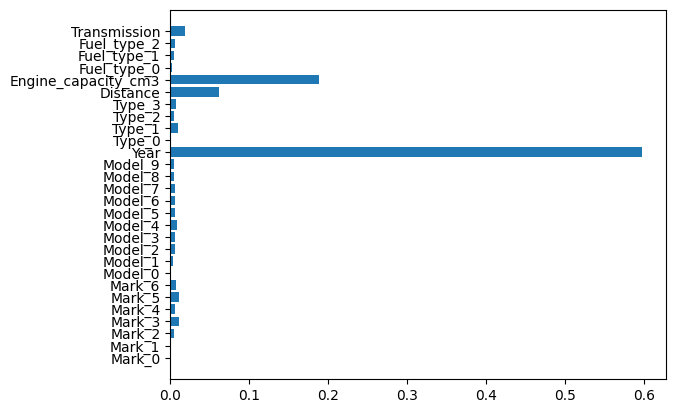

In [61]:
import matplotlib.pyplot as plt
plt.barh(width=dtr.feature_importances_, y=x_regr.columns)

<BarContainer object of 27 artists>

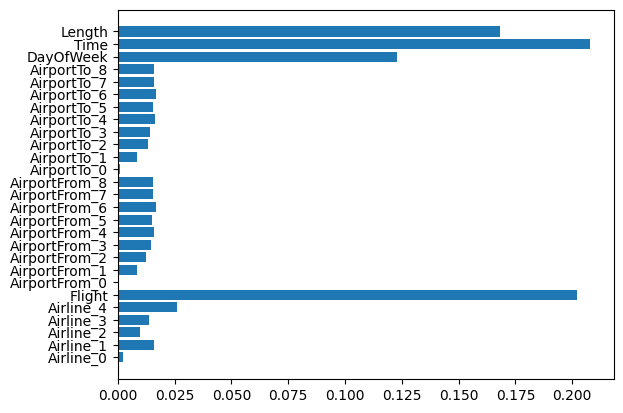

In [62]:
plt.barh(width=dtc.feature_importances_, y=x_clsf.columns)

## PCA (метод главных компонент)

### Регрессия

#### 10 признаков

In [71]:
from sklearn.decomposition import PCA

pca_regr = PCA(n_components=10)
x_pca_regr = pca_regr.fit_transform(x_regr, y_regr)

print(x_pca_regr.shape, x_regr.shape)
sum(pca_regr.explained_variance_ratio_)

(30174, 10) (30174, 28)


0.6568423108817469

In [72]:
test_regr(x_pca_regr, y_regr)

mse: 12216627.367
r2: 0.557


#### 15 признаков

In [74]:
from sklearn.decomposition import PCA

pca_regr = PCA(n_components=15)
x_pca_regr = pca_regr.fit_transform(x_regr, y_regr)

print(x_pca_regr.shape, x_regr.shape)
sum(pca_regr.explained_variance_ratio_)

(30174, 15) (30174, 28)


0.8437878910109243

In [75]:
test_regr(x_pca_regr, y_regr)

mse: 11891195.882
r2: 0.569


Вывод: 
* 28 -> 10: r2 0.82 -> 0.55 ; mse 4_960_000 -> 12_200_000 
* -> 15: r2 -> 0.57 ; mse -> 11_890_000

### Классификация

#### 10 признаков

In [26]:
pca_clsf = PCA(n_components=10)
x_pca_clsf = pca_clsf.fit_transform(x_clsf, y_clsf)

print(x_pca_clsf.shape, x_clsf.shape)
sum(pca_clsf.explained_variance_ratio_)

(173782, 10) (173782, 27)


0.6301957200460884

In [27]:
test_clsf(x_pca_clsf, y_clsf)

              precision    recall  f1-score   support

           0       0.56      0.80      0.66     13073
           1       0.65      0.37      0.47     12995

    accuracy                           0.59     26068
   macro avg       0.61      0.59      0.57     26068
weighted avg       0.61      0.59      0.57     26068



Вывод: 
* 27 -> 10: accuracy 0.62 -> 0.59

## TSNE (t-distributed Stochastic Neighbor Embedding)

### Регрессия

In [17]:
from sklearn.manifold import TSNE

tsne_regr = TSNE(n_components=3)
x_tsne_regr = tsne_regr.fit_transform(x_regr, y_regr)

In [18]:
print(x_tsne_regr.shape, x_regr.shape)

(30174, 3) (30174, 28)


In [19]:
test_regr(x_tsne_regr, y_regr)

mse: 19810341.715
r2: 0.282


Вывод: Размерность уменьшилась в 9 раз, r2 уменьшилась в 3 раза, mse увеличилась в 4 раза

### Классификация

In [39]:
tsne_clsf = TSNE(n_components=3, n_jobs=-1)
x_tsne_clsf = tsne_clsf.fit_transform(x_clsf[:30000],y_clsf[:30000])

In [40]:
test_clsf(x_tsne_clsf, y_clsf[:30000])

              precision    recall  f1-score   support

           0       0.57      0.75      0.64      2277
           1       0.61      0.41      0.49      2223

    accuracy                           0.58      4500
   macro avg       0.59      0.58      0.57      4500
weighted avg       0.59      0.58      0.57      4500



Вывод: на датасете из 30_000 экземпляров удалось уменьшить размерность в 10 раз, при этом accuracy  уменьшилось только на 0.4

## Isomap

### Регрессия

In [7]:
from sklearn.manifold import Isomap

isomap_regr = Isomap(n_components=10, n_neighbors=25, n_jobs=-1)
x_isomap_regr = pd.DataFrame(
    isomap_regr.fit_transform(x_regr[:10000],y_regr[:10000]), 
    columns=isomap_regr.get_feature_names_out()
)

x_isomap_regr.head()

,isomap0,isomap1,isomap2,isomap3,isomap4,isomap5,isomap6,isomap7,isomap8,isomap9
0,2.025882,-3.501641,0.370149,0.008726,-0.735898,-1.066105,3.252320,0.827044,-0.403850,1.349892
1,-3.427346,-1.378681,-0.086455,2.837725,-2.211745,0.805921,-1.765865,1.160166,0.593395,-0.162737
2,-1.274603,-3.467501,1.152009,-1.786538,-1.169051,-1.387549,-1.461624,-0.270791,-0.470967,-1.289325
3,-2.758681,-1.367998,-0.262636,2.067745,-1.235307,1.428990,-2.081559,-0.726582,1.024688,0.313235
4,-1.937965,-0.231559,-2.710060,0.539107,-0.238936,-1.753491,1.537829,-1.754472,-0.317267,2.887490


In [8]:
test_regr(x_isomap_regr, y_regr[:10000])

mse: 13512606.903
r2: 0.52


Вывод: на датасете из 10_000 строк удалось уменьшить размерность в 3 раза, r2 уменьшился в 2 раза, mse возросло в 3 раза

### Классификация

In [9]:
isomap_clsf = Isomap(n_components=10, n_neighbors=15, n_jobs=-1)
x_isomap_clsf = pd.DataFrame(
    isomap_clsf.fit_transform(x_clsf[:10000]),
    columns=isomap_clsf.get_feature_names_out()
)

x_isomap_clsf.head()

,isomap0,isomap1,isomap2,isomap3,isomap4,isomap5,isomap6,isomap7,isomap8,isomap9
0,-0.861445,-3.121021,3.382367,1.659744,-1.489155,0.204174,-0.447597,2.213290,-0.942666,0.685252
1,-3.271888,-1.366604,0.924383,-0.143607,-0.792606,0.037980,-1.044462,-2.547325,1.987422,-0.517680
2,0.819862,2.229932,-2.008901,1.400347,1.060322,-0.423503,-2.376009,0.961104,1.633380,0.203653
3,2.361207,1.580302,-1.957253,-0.875326,1.368131,1.713984,0.742698,-0.476733,-2.527847,-1.234389
4,-2.685348,-1.193309,1.338359,0.952969,-0.800172,-0.854619,-1.293155,-2.242519,1.393622,-0.908378


In [10]:
test_clsf(x_isomap_clsf, y_clsf[:10000])

              precision    recall  f1-score   support

           0       0.57      0.69      0.62       775
           1       0.57      0.43      0.49       725

    accuracy                           0.57      1500
   macro avg       0.57      0.56      0.56      1500
weighted avg       0.57      0.57      0.56      1500



Вывод: на датасете из 10_000 строк accuracy уменьшилась на 0.5 и размерность уменьшилась в 3 раза

## Итоговый вывод
Для моих данных лучше всего подошёл SelectKBest из-за своей скорости и малых изменений в метриках

# ЗАДАНИЕ №2*.

1. Самостоятельно реализуйте алгоритм PCA. На основе датасета для задачи классификации выполните понижение размерности до 2 (преобразуйте данные в двумерное пространство). Выполните визуализацию данных (точки на плоскости).
2. Выполнить кластеризацию преобразованных в пункте 1 данных с помощью Вашей реализации алгоритма KMeans из ЛР6.